In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lokeshparab/amazon-products-dataset")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import glob
import os

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(path, '*.csv'))

# Read each CSV into a DataFrame and store in a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Combine all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# View the result
print(df.head())

In [1]:
import pandas as pd

path = r"C:\Users\abhis\.cache\kagglehub\datasets\lokeshparab\amazon-products-dataset\versions\2"
df = pd.read_csv(path + r'\Amazon-Products.csv', index_col=0)
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...
1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [2]:
df.describe(include='all')

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,551585,551585,551585,551585,551585,375791,375791,490422,533772
unique,396210,20,112,462414,551585,49,8342,27511,23170
top,Zeya Yellow Gold Ring,accessories,Formal Shoes,https://m.media-amazon.com/images/I/51uEPldT42...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.0,1,₹499,₹999
freq,718,116141,19200,3044,1,36609,39816,18248,48774


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551585 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 42.1+ MB


In [4]:
# Find duplicates based on specific columns
# These rows only differ due to the link having different URL parameters 
subset_dup = ['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']
duplicate_rows = df.duplicated(subset=subset_dup)

# Count number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop all duplicate rows
df.drop_duplicates(subset=subset_dup, inplace=True)

Number of duplicate rows: 98023


In [5]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 453562


In [6]:
# Handling Null Values
null_counts = df.isnull().sum()

null_counts

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           149189
no_of_ratings     149189
discount_price     51536
actual_price       13596
dtype: int64

In [7]:
# This drops too many rows. Look into why

# df.drop(index=df[df['discount_price'].isnull() & df['actual_price'].isnull()].index, inplace=True)

In [8]:
# If discount_price is null, fill it with actual_price
df['discount_price'] = df['discount_price'].fillna(df['actual_price'])

# If actual_price is null, fill it with discount_price
df['actual_price'] = df['actual_price'].fillna(df['discount_price'])

# Drop any remaining empty Actual_price rows
df = df.dropna(subset=['actual_price']).copy()

In [9]:
# Fill empty values in ratings and no_of_ratings with 1 and 0, and convert to numeric
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').fillna(1)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce').fillna(0)

In [10]:
# Verify that all null values are handled.
null_counts = df.isnull().sum()

null_counts

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [11]:
for col in ['discount_price', 'actual_price']:
    df[col] = (
        df[col].replace('[₹,]', '', regex=True)
        .astype(float)
        .round(-1)
        .astype(int)
    )

In [12]:
df.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price      int64
actual_price        int64
dtype: object

In [13]:
df.describe(include='all')

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,439966,439966,439966,439966,439966,439966.000000,439966.000000,4.399660e+05,4.399660e+05
unique,384827,20,112,403970,439966,NaN,NaN,NaN,NaN
top,Zeya Yellow Gold Ring,accessories,Clothing,https://m.media-amazon.com/images/I/51uEPldT42...,https://www.amazon.in/Lloyd-Inverter-Convertib...,NaN,NaN,NaN,NaN
freq,398,96926,18180,3020,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.875009,49.704400,2.930621e+03,2.707843e+04
std,NaN,NaN,NaN,NaN,NaN,1.475827,134.145217,9.858367e+03,1.492567e+07
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,4.000000e+02,9.500000e+02
50%,NaN,NaN,NaN,NaN,NaN,3.500000,2.000000,7.000000e+02,1.600000e+03
75%,NaN,NaN,NaN,NaN,NaN,4.100000,23.000000,1.550000e+03,3.000000e+03


In [17]:
# Now keep only the required columns
columns_to_keep = ['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']
dfnew = df[columns_to_keep].copy()

# Create new features 'discount_percentage' and 'price_difference'
dfnew['discount_percentage'] = (((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100)
dfnew['price_difference'] = (df['actual_price'] - df['discount_price'])

print(dfnew.head())

                                                name main_category  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...    appliances   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...    appliances   
2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...    appliances   
3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...    appliances   
4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...    appliances   

       sub_category  ratings  no_of_ratings  discount_price  actual_price  \
0  Air Conditioners      4.2            0.0           33000         58990   
1  Air Conditioners      4.2            0.0           46490         75990   
2  Air Conditioners      4.2            0.0           34490         61990   
3  Air Conditioners      4.0           69.0           37990         68990   
4  Air Conditioners      4.1          630.0           34490         67790   

   discount_percentage  price_difference  
0            44.058315             25990  
1            38.820897        

# Section: EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

main_category
accessories                96926
appliances                 20771
bags & luggage              8233
beauty & health             9469
car & motorbike             6793
grocery & gourmet foods     3177
home & kitchen             13620
home, kitchen, pets           17
industrial supplies         3812
kids' fashion              11171
men's clothing             61710
men's shoes                49560
music                       1031
pet supplies                1543
sports & fitness           11281
stores                     19288
toys & baby products        5768
tv, audio & cameras        53197
women's clothing           57592
women's shoes               5007
dtype: int64


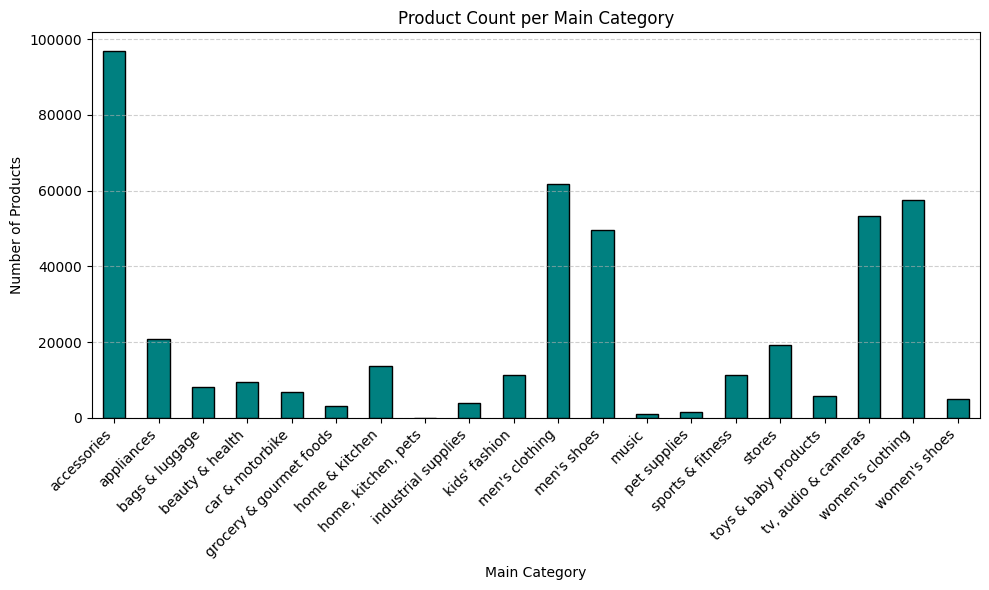

In [30]:
# Count products by main_category
product_counts = dfnew.groupby('main_category').size()
# product_counts = dfnew['main_category'].value_counts() #to sort in descending order

print(product_counts)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.title('Product Count per Main Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

main_category
accessories                 7
appliances                  6
bags & luggage              6
beauty & health             8
car & motorbike             6
grocery & gourmet foods     3
home & kitchen             12
home, kitchen, pets         1
industrial supplies         4
kids' fashion               6
men's clothing              4
men's shoes                 3
music                       1
pet supplies                2
sports & fitness           12
stores                      6
toys & baby products        9
tv, audio & cameras         9
women's clothing            4
women's shoes               3
Name: sub_category, dtype: int64


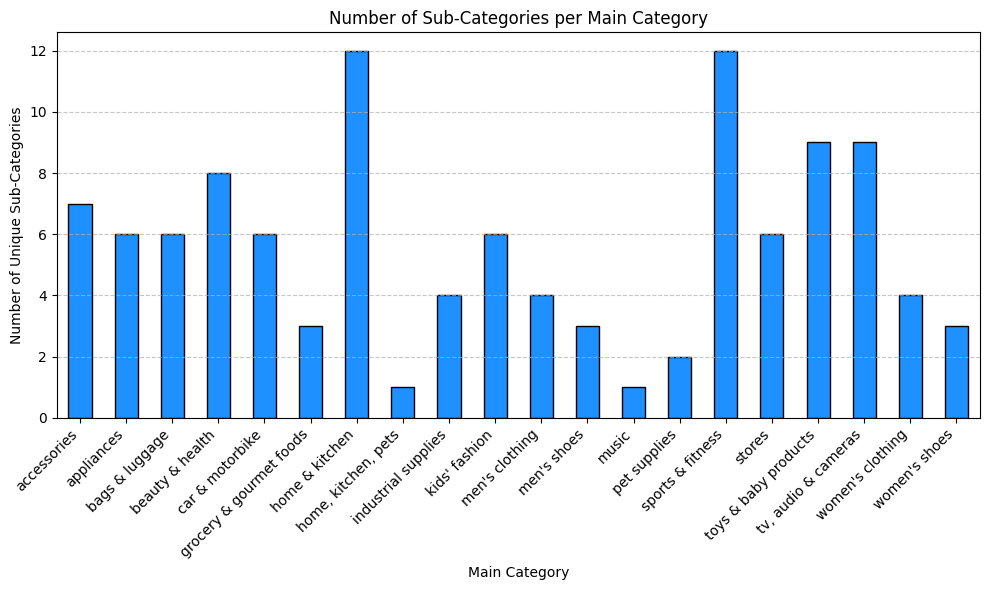

In [20]:
# Count unique sub_categories for each main_category
subcat_counts = dfnew.groupby('main_category')['sub_category'].nunique()

print(subcat_counts)

# Plot as a bar graph
plt.figure(figsize=(10, 6))
subcat_counts.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.xlabel('Main Category')
plt.ylabel('Number of Unique Sub-Categories')
plt.title('Number of Sub-Categories per Main Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

main_category
accessories                3255530.0
appliances                 1650142.0
bags & luggage              133231.0
beauty & health             814158.0
car & motorbike             382909.0
grocery & gourmet foods     378910.0
home & kitchen             1488858.0
home, kitchen, pets             48.0
industrial supplies         167160.0
kids' fashion               377580.0
men's clothing             1320151.0
men's shoes                1432854.0
music                        54394.0
pet supplies                122029.0
sports & fitness            599223.0
stores                     2022037.0
toys & baby products        514403.0
tv, audio & cameras        3424192.0
women's clothing           3592969.0
women's shoes               137468.0
Name: no_of_ratings, dtype: float64


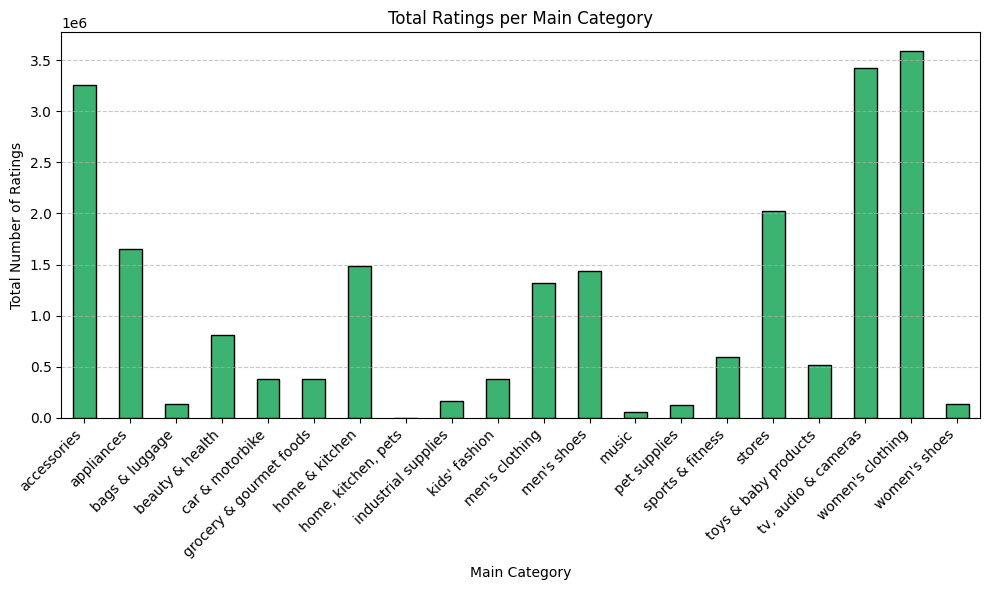

In [23]:
# Group by 'main_category' and sum 'no_of_ratings'
total_ratings = dfnew.groupby('main_category')['no_of_ratings'].sum()

print(total_ratings)

# Plot the bar graph
plt.figure(figsize=(10, 6))
total_ratings.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Main Category')
plt.ylabel('Total Number of Ratings')
plt.title('Total Ratings per Main Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

main_category
accessories                2.704629
appliances                 3.253608
bags & luggage             1.866513
beauty & health            3.304636
car & motorbike            3.182776
grocery & gourmet foods    3.799717
home & kitchen             3.707144
home, kitchen, pets        2.700000
industrial supplies        2.958657
kids' fashion              2.353988
men's clothing             2.601706
men's shoes                2.397226
music                      3.330941
pet supplies               3.633052
sports & fitness           2.961448
stores                     3.529863
toys & baby products       3.577705
tv, audio & cameras        2.936036
women's clothing           3.260840
women's shoes              2.436828
Name: ratings, dtype: float64


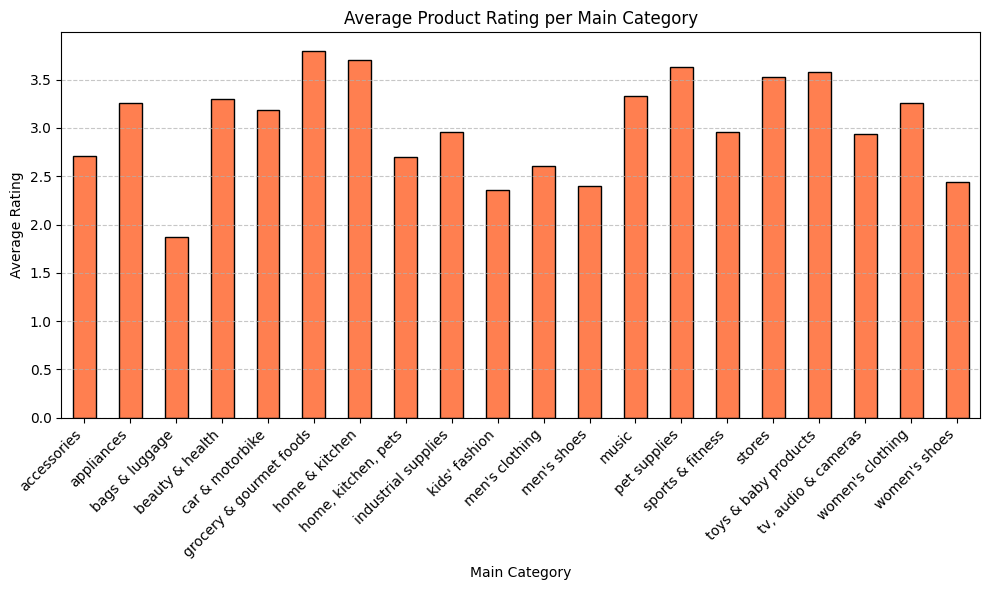

In [24]:
# Group by 'main_category' and calculate average rating
avg_ratings = dfnew.groupby('main_category')['ratings'].mean()

print(avg_ratings)

# Plot the bar graph
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.title('Average Product Rating per Main Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

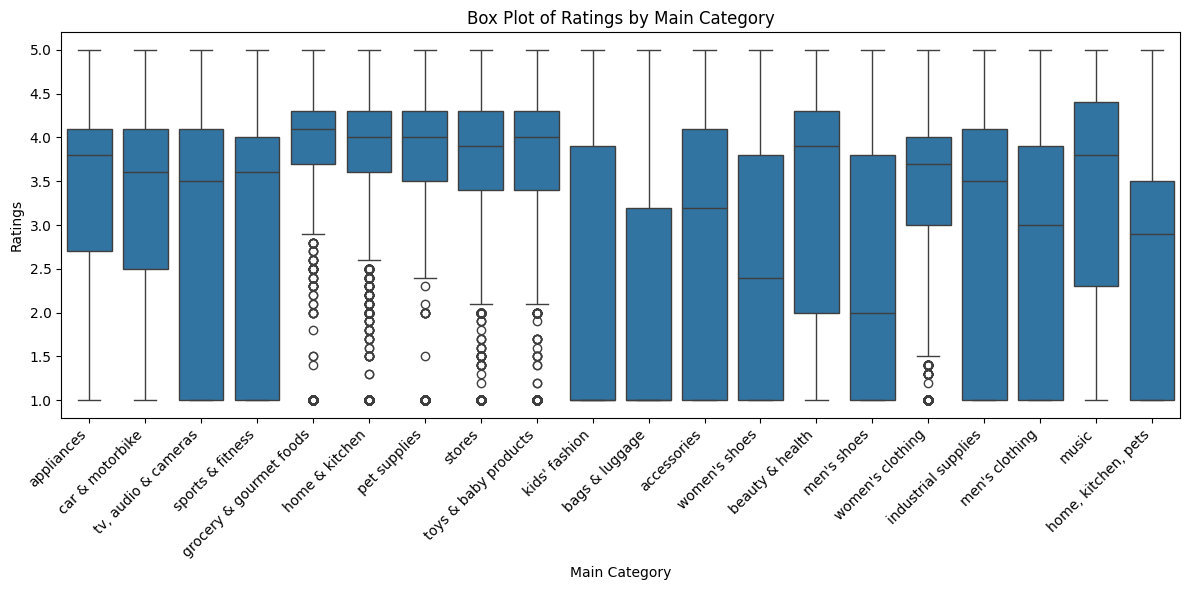

In [27]:
# Boxplot for Main Category vs Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='ratings', data=dfnew)
plt.xlabel('Main Category')
plt.ylabel('Ratings')
plt.title('Box Plot of Ratings by Main Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

main_category
accessories                50.323578
appliances                 37.702949
bags & luggage             45.011252
beauty & health            31.751987
car & motorbike            43.347444
grocery & gourmet foods    18.329624
home & kitchen             45.777005
home, kitchen, pets        17.219876
industrial supplies        38.238405
kids' fashion              43.593075
men's clothing             41.166512
men's shoes                36.215608
music                      37.365465
pet supplies               31.281808
sports & fitness           44.156591
stores                     35.483787
toys & baby products       34.551148
tv, audio & cameras        46.426237
women's clothing           55.548603
women's shoes              39.126590
Name: discount_percentage, dtype: float64


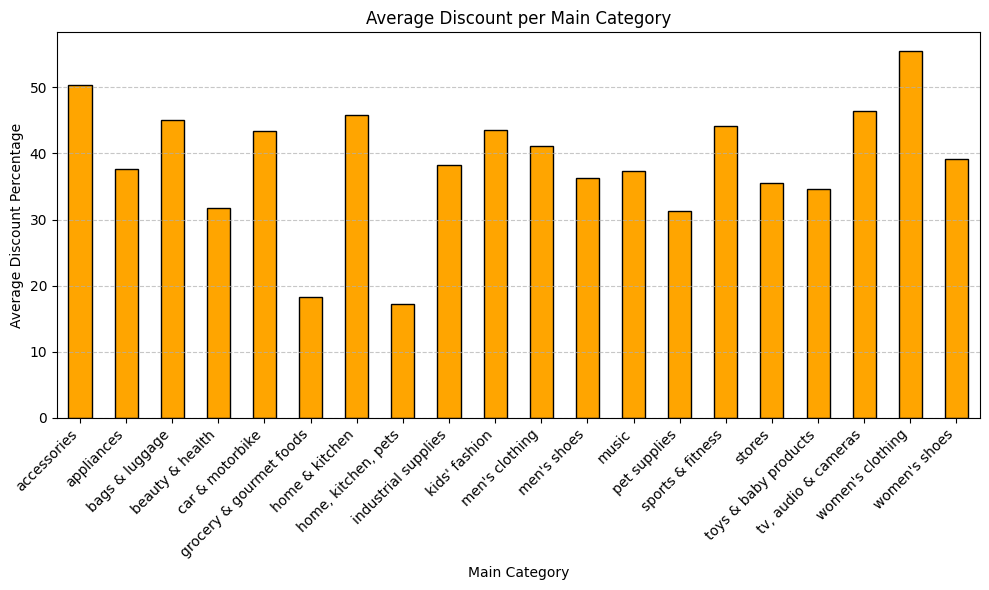

In [28]:
# Group by main_category and calculate average discount percentage
avg_discount = dfnew.groupby('main_category')['discount_percentage'].mean()

# Display the result
print(avg_discount)

# Plot the average discount percentage per main category
plt.figure(figsize=(10, 6))
avg_discount.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Main Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount per Main Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()